In [1]:
import doctest
import io
import math
from typing import List, Tuple

import matplotlib.pyplot as plt

In [2]:
DATA = "input.txt"

# Part 1

The problem forms an inverse parabola defined by the formula $y = (T - t)t$ where $T$ is the race time and $t$ is the time the button is held for. e.g. for the race that lasts 7 milliseconds, if the button is held for 3 milliseconds there is $7 - 3 = 4$ milliseconds remaining and the boat travels at $t = 3$ millimeters per millisecond.

Plotting the example and the equation:

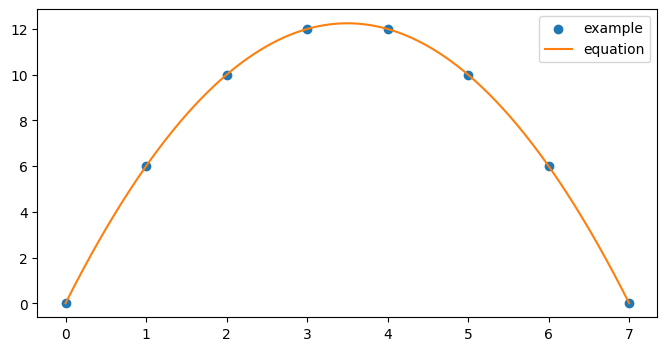

In [3]:
fig, ax = plt.subplots(figsize=(8, 4))

x = [0, 1, 2, 3, 4, 5, 6, 7]
y = [0, 6, 10, 12, 12, 10, 6, 0]
ax.scatter(x, y, label="example")

x = list([7 * (i / 1000) for i in range(1000 + 1)])
y = [(7 - t)*t for t in x]
ax.plot(x, y, label="equation", color="C1")

ax.legend()
plt.show()

To find the number of solutions we need to solve the equation for the record distance and then find the total points between them.

In [4]:
def better_ways(race_time: int, record: int) -> int:
    """Returns the number of ways ``record`` can be beaten.

    Example:

        >>> better_ways(7, 9)
        4
        >>> better_ways(15, 40)
        8
        >>> better_ways(30, 200)
        9
    """
    sqrt_disc = math.sqrt((-race_time)**2 - 4*record)
    l = (race_time - sqrt_disc) / 2
    r = (race_time + sqrt_disc) / 2
    n = math.floor(r) - math.ceil(l) + 1
    # exclude endpoints, needs to be better than not equal to
    if math.floor(r) == math.ceil(r):
        n -= 1
    if math.floor(l) == math.ceil(l):
        n -= 1
    return n

In [5]:
better_ways(30, 200)

9

In [6]:
def parse_input(data: io.TextIOBase) -> List[Tuple[int, int]]:
    """Returns the time and distance tuples from input.

    Example:

        >>> data = io.StringIO('''Time:      7  15   30
        ... Distance:  9  40  200
        ... ''')
        >>> parse_input(data)
        [(7, 9), (15, 40), (30, 200)]
    """
    data_iter = iter(data)
    times = [int(t) for t in next(data_iter).split()[1:]]
    dists = [int(d) for d in next(data_iter).split()[1:]]
    return list(zip(times, dists))

In [7]:
doctest.testmod()

TestResults(failed=0, attempted=5)

In [8]:
with open(DATA, "r") as f:
    races = parse_input(f)
math.prod([better_ways(race_time, record) for race_time, record in races])

741000

# Part 2

Use Part 1 solution, just need to update the input parsing!

In [9]:
def parse_input_2(data: io.TextIOBase) -> Tuple[int, int]:
    """Returns the time and distance from input.

    Example:

        >>> data = io.StringIO('''Time:      7  15   30
        ... Distance:  9  40  200
        ... ''')
        >>> parse_input_2(data)
        (71530, 940200)
    """
    data_iter = iter(data)
    time = int("".join(next(data_iter).split()[1:]))
    dist = int("".join(next(data_iter).split()[1:]))
    return time, dist

In [10]:
doctest.testmod()

TestResults(failed=0, attempted=7)

In [11]:
with open(DATA, "r") as f:
    time, dist = parse_input_2(f)
better_ways(time, dist)

38220708